### Read All the excel files

In [61]:
from pathlib import Path
import pandas as pd
import os

def read_file(file_path):
    file_extension = file_path.suffix.lower()[1:]

    try:
        if file_extension == 'xlsx':
            # Read all sheets from the Excel file
            df_dict = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')  # sheet_name=None reads all sheets
            sheet_names = list(df_dict.keys())  # Get the list of all sheet names
        elif file_extension == 'xls':
            # Read all sheets from the older Excel format
            df_dict = pd.read_excel(file_path, sheet_name=None)  # sheet_name=None reads all sheets
            sheet_names = list(df_dict.keys())  # Get the list of all sheet names
        else:
            print(f"File format not supported: {file_path}")
            return None, []

        print(f"Successfully read file: {file_path}")
        return df_dict, sheet_names
    except UnicodeDecodeError:
        print(f"Error reading {file_path} with utf-8. Trying with ISO-8859-1 encoding.")
        try:
            df_dict = {file_path.stem: pd.read_csv(file_path, encoding='ISO-8859-1')}
            return df_dict, [file_path.stem]
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            return None, []
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, []

def process_files_in_folder(folder_path):
    folder = Path(folder_path)
    all_data = {}  # Dictionary to store all file and sheet data
    file_sheet_map = {}  # Dictionary to store all file names and their corresponding sheet names

    if not folder.exists():
        print(f"Folder does not exist: {folder_path}")
        return
    
    for file in folder.iterdir():
        if file.exists() and file.is_file() and file.suffix.lower() in ['.xlsx', '.xls', '.csv']:
            file_name_without_extension = file.stem  # Get the file name without the extension
            file_name_without_extension = file.stem.replace("Report", "").strip()
            print(f"Processing file: {file.name}")
            df_dict, sheet_names = read_file(file)
            if df_dict is not None:
                # Store the dataframe and sheet names using the file name without the extension
                all_data[file_name_without_extension] = df_dict
                file_sheet_map[file_name_without_extension] = sheet_names
            else:
                print(f"Skipping {file.name} due to an error.")
        else:
            print(f"File not found or unsupported format: {file.name}")
    
    return all_data, file_sheet_map

# Example usage
folder_path = 'Reports/'  # Replace with your actual folder path
all_data, file_sheet_map = process_files_in_folder(folder_path)

# Access all the data (file -> sheet -> DataFrame)
print("Files and their corresponding sheets:")
for file_name, sheet_names in file_sheet_map.items():
    print(f"File: {file_name} -> Sheets: {sheet_names}")


Processing file: Marc O Polo Report.xlsx
Successfully read file: Reports/Marc O Polo Report.xlsx
File not found or unsupported format: .DS_Store
Processing file: Burberry Report.xlsx
Successfully read file: Reports/Burberry Report.xlsx
Processing file: LVMH Group Report.xlsx
Successfully read file: Reports/LVMH Group Report.xlsx
Processing file: Porsche Report.xlsx
Successfully read file: Reports/Porsche Report.xlsx
Processing file: PVH Corp Report.xlsx
Successfully read file: Reports/PVH Corp Report.xlsx
Processing file: Adidas Report.xlsx
Successfully read file: Reports/Adidas Report.xlsx
Processing file: Ralph Lauren Report.xlsx
Successfully read file: Reports/Ralph Lauren Report.xlsx
Processing file: Mercedes Benz AG Report.xlsx
Successfully read file: Reports/Mercedes Benz AG Report.xlsx
Processing file: Giorgio Armani Report.xlsx
Successfully read file: Reports/Giorgio Armani Report.xlsx
Processing file: Bosch Report.xlsx
Successfully read file: Reports/Bosch Report.xlsx
Files an

In [62]:
len(all_data)

10

In [64]:
# Check the structure of company movement df
all_data['Marc O Polo']['Company Movements']

,Company,Departures,Hires,Ratio,Net change
0,HUGO BOSS,8,1,-8,-7
1,H&M,0,4,4,4
2,HALLHUBER,0,4,4,4
3,PUMA Group,1,3,3,2
4,BMW Group,1,2,2,1
...,...,...,...,...,...
95,LPJ Studios,0,1,1,1
96,Haas Fertigbau Deutschland,0,1,1,1
97,Biofabrik Technologies GmbH,0,1,1,1
98,ECCO,0,1,1,1


### Filter out for HUGO BOSS for company movements

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
def search_company_in_sheets(all_data, company_name):

    results = []

    for file_name, sheets in all_data.items():
        for sheet_name, df in sheets.items():
            # Check if 'Company' column exists in the sheet
            if 'Company' in df.columns:
                # Filter rows where 'Company' column matches the company_name
                company_row = df[df['Company'] == company_name]

                if not company_row.empty:
                    # Get the 'Departures' and 'Hires' columns (assuming they exist)
                    departures = company_row['Departures'].values[0] if 'Departures' in company_row.columns else None
                    hires = company_row['Hires'].values[0] if 'Hires' in company_row.columns else None
                    net_change = company_row['Net change'].values[0] if 'Net change' in company_row.columns else None

                    results.append({
                        'Competitor': file_name,
                        'Company': company_name,
                        'Moved to HUGO BOSS': departures,
                        'Hired from HUGO BOSS': hires,
                        'Net Change': net_change
                    })

    # Convert results to a Pandas DataFrame
    result_df = pd.DataFrame(results)

    return result_df

company_name_to_search = 'HUGO BOSS'
search_results_df = search_company_in_sheets(all_data, company_name_to_search)

# Sort and Display the DataFrame
result_df = search_results_df.sort_values(by='Net Change', ascending=False)
print(result_df)


         Competitor    Company  Moved to HUGO BOSS  Hired from HUGO BOSS  \
2        LVMH Group  HUGO BOSS                  17                    32   
8    Giorgio Armani  HUGO BOSS                   3                    10   
1          Burberry  HUGO BOSS                   4                     8   
3           Porsche  HUGO BOSS                   3                     5   
6      Ralph Lauren  HUGO BOSS                   6                     7   
5            Adidas  HUGO BOSS                   6                     6   
7  Mercedes Benz AG  HUGO BOSS                   5                     5   
9             Bosch  HUGO BOSS                   6                     2   
4          PVH Corp  HUGO BOSS                  10                     4   
0       Marc O Polo  HUGO BOSS                   8                     1   

   Net Change  
2          15  
8           7  
1           4  
3           2  
6           1  
5           0  
7           0  
9          -4  
4          -6  
0  

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_net_change(df):
    """
    This function creates a bar chart using Seaborn, showing the net change for each file, sorted by net change.
    
    Parameters:
    - df: A Pandas DataFrame containing the sorted results with net change.
    """
    # Ensure the DataFrame is sorted by 'Net Change'
    df_sorted = df.sort_values(by='Net Change', ascending=False)

    # Set the figure size and style
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Create a Seaborn barplot and use the x variable for the hue
    ax = sns.barplot(x='Competitor', y='Net Change', data=df_sorted, palette="Blues_d", hue='Competitor', dodge=False, legend=False)

    # Customize the labels and title
    plt.xlabel('Competitor', fontsize=12)
    plt.ylabel('Net Change', fontsize=12)
    plt.title('Net Change of Employees Leaving HUGO BOSS', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')


/var/folders/yy/7jj_crdd2md8tf5ft095lnfr0000gn/T/ipykernel_35334/507192806.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')


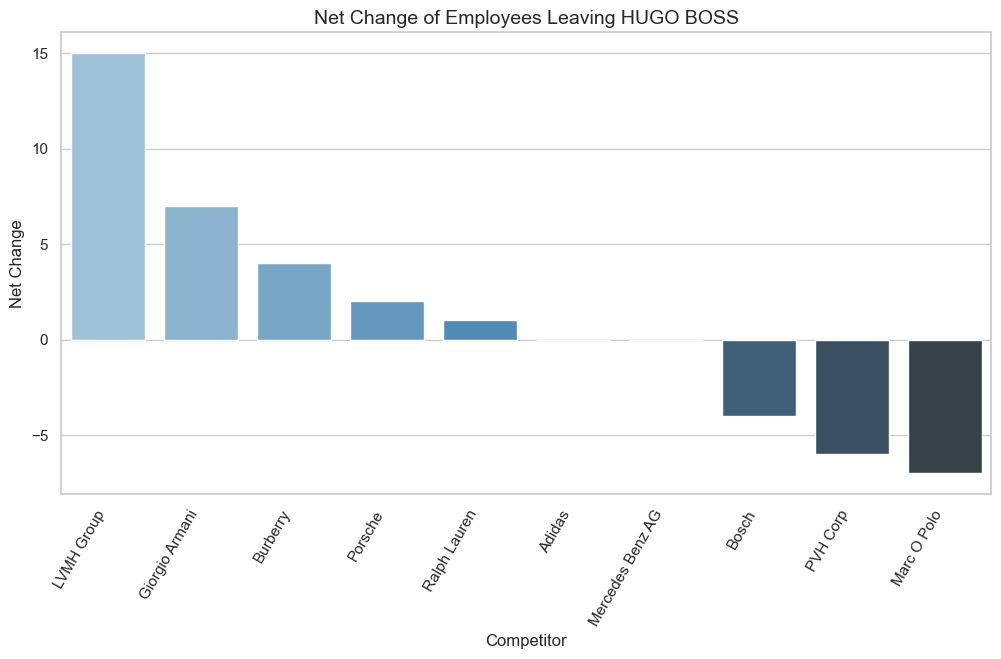

In [100]:
plot_net_change(search_results_df)

In [101]:
all_data['LVMH Group']['Fields of Study']

,Fields of study,Employees,1y growth,1y hires,% of employees,HUGO BOSS %
0,Marketing,8808,0.039169,2695,0.055980,0.032144
1,"Business Administration and Management, General",8158,0.038971,2393,0.051849,0.052620
2,Economics,5721,0.039993,2161,0.036360,0.028915
3,"Business/Commerce, General",3932,0.049373,1273,0.024990,0.026714
4,Fashion/Apparel Design,3155,0.038512,1049,0.020052,0.036915
...,...,...,...,...,...,...
94,Auditing,328,0.018634,84,0.002085,0.000954
95,Chinese Studies,321,0.028846,90,0.002040,0.001101
96,Computer Systems Networking and Telecommunicat...,320,0.003135,59,0.002034,0.001248
97,"Biology/Biological Sciences, General",318,0.049505,101,0.002021,0.000807


In [127]:
all_data['LVMH Group']['Degrees']

,Degree,LVMH,Industry,HUGO BOSS
0,Master of Business Administration,0.102530,0.105717,0.096895
1,Master's Degree,0.390310,0.303081,0.329497
2,Associate's Degree,0.066094,0.055132,0.046039
3,Bachelor's Degree,0.432060,0.523778,0.518469
4,Doctor of Philosophy,0.009007,0.012292,0.009101


In [128]:
all_data['LVMH Group']['Skills']

,Skills,Employees,1y growth,1y hires,Job posts,% of employees,HUGO BOSS %
0,Merchandising,27307,0.011146,6090,639,0.173552,0.179657
1,Luxury Goods,26288,-0.000570,4802,58,0.167076,0.057097
2,Fashion,23150,0.024155,5188,196,0.147132,0.279613
3,Jewelry,21985,0.002417,3549,91,0.139727,0.018641
4,Consumer Services,21748,0.012760,4894,0,0.138221,0.104579
...,...,...,...,...,...,...,...
95,Brand Development,3343,-0.010947,625,5,0.021247,0.014311
96,Accounting,3343,0.060596,1031,85,0.021247,0.016953
97,Digital Technology,3313,0.017506,1215,73,0.021056,0.002715
98,In-Store Marketing,3310,-0.009279,823,296,0.021037,0.012036


              Skills  Employees  1y growth  1y hires  Job posts  \
0      Merchandising      27307   0.011146      6090        639   
1       Luxury Goods      26288  -0.000570      4802         58   
2            Fashion      23150   0.024155      5188        196   
3            Jewelry      21985   0.002417      3549         91   
4  Consumer Services      21748   0.012760      4894          0   

   % of employees  HUGO BOSS %  
0        0.173552     0.179657  
1        0.167076     0.057097  
2        0.147132     0.279613  
3        0.139727     0.018641  
4        0.138221     0.104579  
Top 10 Skills at LV:
                 Skills  Employees  1y growth  1y hires  Job posts  \
0         Merchandising      27307   0.011146      6090        639   
1          Luxury Goods      26288  -0.000570      4802         58   
2               Fashion      23150   0.024155      5188        196   
3               Jewelry      21985   0.002417      3549         91   
4     Consumer Services     

/var/folders/yy/7jj_crdd2md8tf5ft095lnfr0000gn/T/ipykernel_35334/1485838634.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Skills', y='Employees', data=top_10_skills, palette='coolwarm')


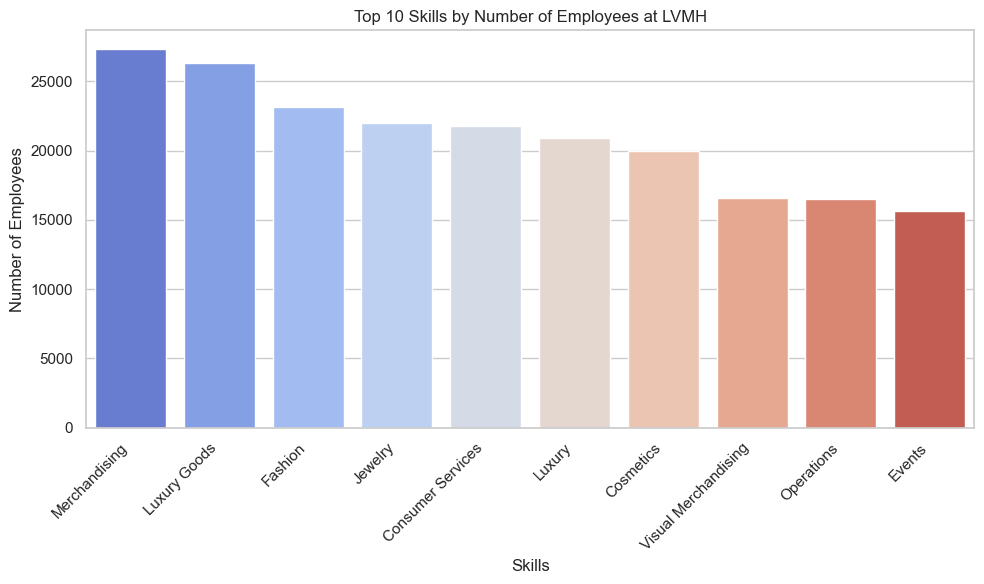

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the 'Skills' subsheet for LV from all_data
skills_data = all_data['LVMH Group']['Skills'] 
# Display the first few rows to understand the structure
print(skills_data.head())

# Sort by the number of employees and get the top 10 skills
top_10_skills = skills_data.sort_values(by='Employees', ascending=False).head(10)

# Display the top 10 skills
print("Top 10 Skills at LV:")
print(top_10_skills[['Skills', 'Employees', '1y growth', '1y hires', 'Job posts', '% of employees', 'HUGO BOSS %']])

# Plot 1: Number of employees by top 10 skills
plt.figure(figsize=(10, 6))
sns.barplot(x='Skills', y='Employees', data=top_10_skills, palette='coolwarm')
plt.title('Top 10 Skills by Number of Employees at LVMH')
plt.xlabel('Skills')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [130]:
all_data['LVMH Group']['Attrition by Locations']

,Location,Attrition,HUGO BOSS attrition,% of employees
0,Greater Paris Metropolitan Region,0.202024,0.280840,0.154828
1,New York City Metropolitan Area,0.151592,0.231183,0.047406
2,United Arab Emirates,0.118835,0.129310,0.025448
3,Los Angeles Metropolitan Area,0.118314,0.090226,0.024361
4,"London Area, United Kingdom",0.192808,0.174589,0.023369
...,...,...,...,...
95,Greater Tampa Bay Area,0.124197,NaN,0.001608
96,"Épernay, Grand Est, France",0.047516,NaN,0.001595
97,"Saint-Jean-de-Braye, Centre-Val de Loire, France",0.048780,NaN,0.001583
98,Greater Turin Metropolitan Area,0.150628,NaN,0.001576


In [135]:
all_data['LVMH Group']['Location Movements']

,Location,Departures,Hires,Ratio,Net change
0,Greater Paris Metropolitan Region,4721,7073,1.498200,2352
1,New York City Metropolitan Area,1102,1525,1.383848,423
2,"London Area, United Kingdom",689,940,1.364296,251
3,United Arab Emirates,453,889,1.962472,436
4,Greater Milan Metropolitan Area,515,782,1.518447,267
...,...,...,...,...,...
107,Greater Edinburgh Area,35,40,1.142857,5
108,Greater Marbella Metropolitan Area,31,41,1.322581,10
109,Greater Tours Area,35,35,1.000000,0
110,Greater Hyderabad Area,8,60,7.500000,52


In [136]:
import pandas as pd

# Here we extract data from all relevant company files
lvmh_attrition = all_data['LVMH Group']['Attrition by Locations']
armani_attrition = all_data['Giorgio Armani']['Attrition by Locations']
burberry_attrition = all_data['Burberry']['Attrition by Locations']
porsche_attrition = all_data['Porsche']['Attrition by Locations']

# Step 1: Combine the attrition data into a single DataFrame
combined_attrition = pd.concat([lvmh_attrition.assign(Company='LVMH'),
                                armani_attrition.assign(Company='Armani'),
                                burberry_attrition.assign(Company='Burberry'),
                                porsche_attrition.assign(Company='Porsche')])

# Step 2: Filter the data to focus on HUGO BOSS attrition
hugo_boss_attrition = combined_attrition[['Location', 'Attrition' ,'HUGO BOSS attrition', 'Company']]

# Step 3: Sort by HUGO BOSS attrition in descending order
hugo_boss_attrition = hugo_boss_attrition.sort_values(by='HUGO BOSS attrition', ascending=False)

# Step 4: Drop duplicates based on the 'Location' column, keeping the first entry (highest attrition)
# Keep only the location with the highest HUGO BOSS attrition
hugo_boss_attrition_no_duplicates = hugo_boss_attrition.drop_duplicates(subset='Location', keep='first')

# Step 5: Display the top 5 locations by HUGO BOSS attrition
top_5_hugo_boss_attrition = hugo_boss_attrition_no_duplicates.head(5)
print("Top 5 Locations by HUGO BOSS Attrition (after removing duplicates based on highest attrition):")
print(top_5_hugo_boss_attrition)


Top 5 Locations by HUGO BOSS Attrition (after removing duplicates based on highest attrition):
                            Location  Attrition  HUGO BOSS attrition  Company
32          Zürich Metropolitan Area   0.363636             0.422018  Porsche
40                 Greater Lyon Area   0.278777             0.390805     LVMH
1             Greater Karlsruhe Area   0.207283             0.349206  Porsche
57  Greater Munich Metropolitan Area   0.258440             0.342541     LVMH
13             Greater Freiburg Area   0.370968             0.341463  Porsche


/var/folders/yy/7jj_crdd2md8tf5ft095lnfr0000gn/T/ipykernel_35334/3062408868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='HUGO BOSS attrition', data=top_5_hugo_boss_attrition, palette='coolwarm')


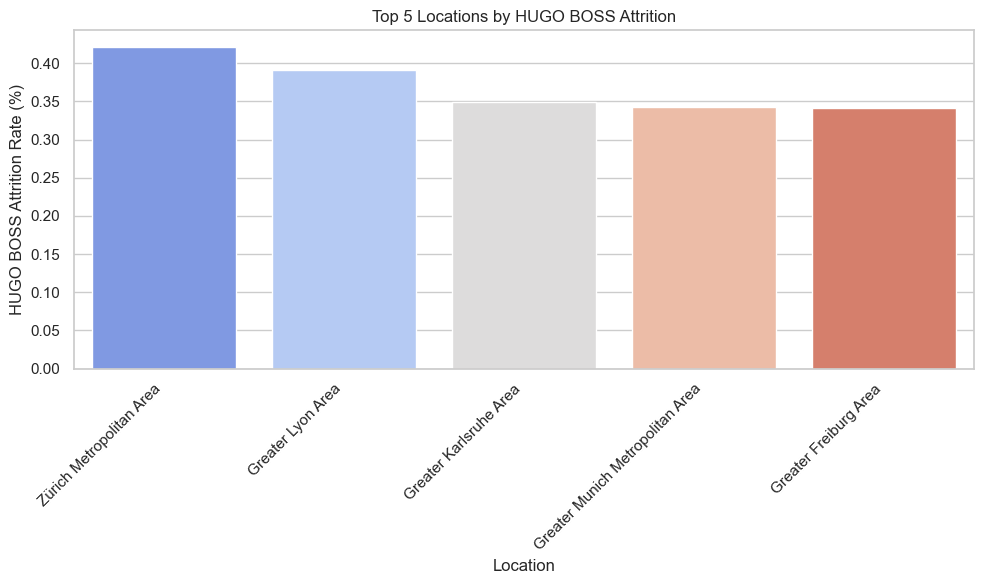

In [137]:
# Plot: HUGO BOSS Attrition by Location
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='HUGO BOSS attrition', data=top_5_hugo_boss_attrition, palette='coolwarm')
plt.title('Top 5 Locations by HUGO BOSS Attrition')
plt.xlabel('Location')
plt.ylabel('HUGO BOSS Attrition Rate (%)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



Hires and Departures by Location and Company:
                             Location   Company  Hires  Departures  Net change
21                  Greater Lyon Area      LVMH    234         155          79
41   Greater Munich Metropolitan Area      LVMH    133         111          22
81           Zürich Metropolitan Area      LVMH     71          46          25
13   Greater Munich Metropolitan Area    Armani      9          11          -2
81           Zürich Metropolitan Area    Armani      2           2           0
91                  Greater Lyon Area    Armani      2           1           1
34   Greater Munich Metropolitan Area  Burberry      8           6           2
64           Zürich Metropolitan Area  Burberry      2           4          -2
95                  Greater Lyon Area  Burberry      2           1           1
1              Greater Karlsruhe Area   Porsche    290         148         142
2    Greater Munich Metropolitan Area   Porsche    142          94          48
10   

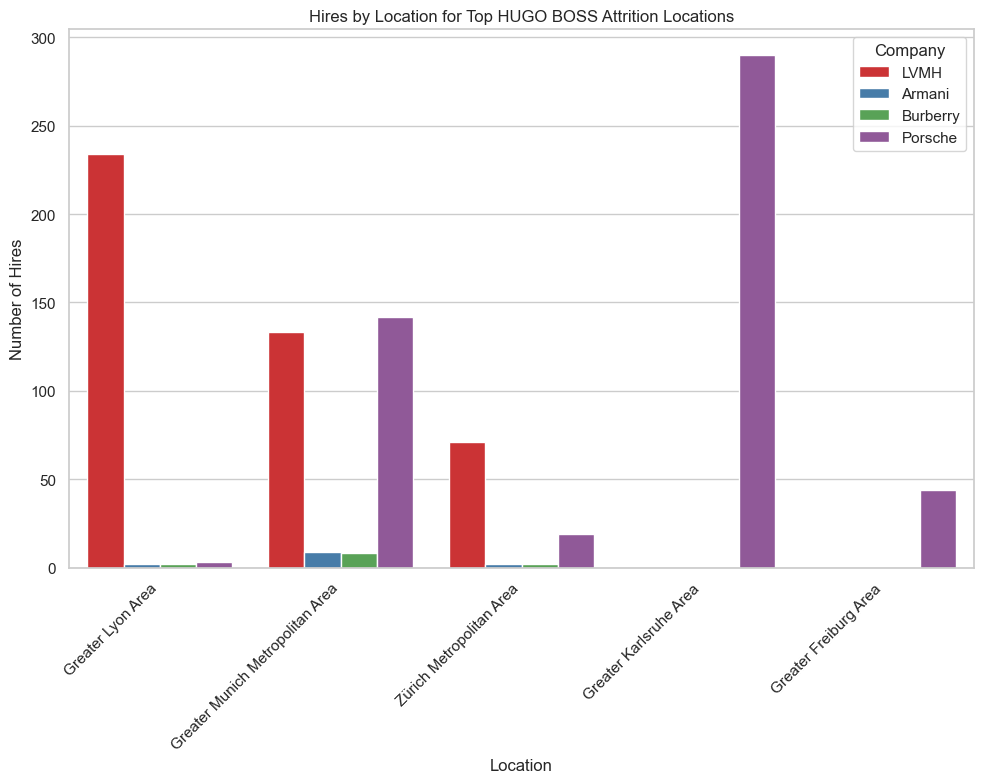

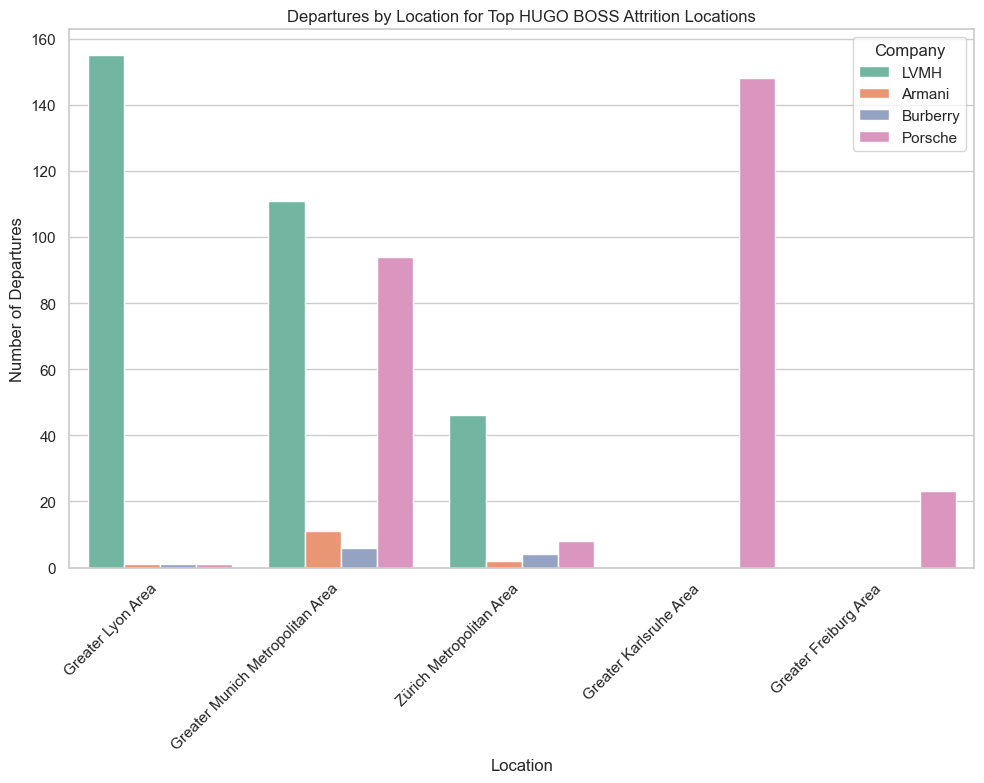

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract Location Movement data from each company
lvmh_movement = all_data['LVMH Group']['Location Movements']
armani_movement = all_data['Giorgio Armani']['Location Movements']
burberry_movement = all_data['Burberry']['Location Movements']
porsche_movement = all_data['Porsche']['Location Movements']

# Step 2: Combine the movement data for all companies into one DataFrame
movement_data = pd.concat([lvmh_movement.assign(Company='LVMH'),
                           armani_movement.assign(Company='Armani'),
                           burberry_movement.assign(Company='Burberry'),
                           porsche_movement.assign(Company='Porsche')])

# Step 3: Filter the movement data to focus on the top locations with high HUGO BOSS attrition
# Assuming top_5_hugo_boss_attrition contains the locations you want to check
top_locations = top_5_hugo_boss_attrition['Location'].unique()
filtered_movement_data = movement_data[movement_data['Location'].isin(top_locations)]

# Step 4: Display hires and departures by company for the filtered locations
print("\nHires and Departures by Location and Company:")
print(filtered_movement_data[['Location', 'Company', 'Hires', 'Departures', 'Net change']])

# Step 5: Plot hires and departures for the filtered locations
plt.figure(figsize=(10, 8))
sns.barplot(x='Location', y='Hires', hue='Company', data=filtered_movement_data, palette='Set1')
plt.title('Hires by Location for Top HUGO BOSS Attrition Locations')
plt.xlabel('Location')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot Departures
plt.figure(figsize=(10, 8))
sns.barplot(x='Location', y='Departures', hue='Company', data=filtered_movement_data, palette='Set2')
plt.title('Departures by Location for Top HUGO BOSS Attrition Locations')
plt.xlabel('Location')
plt.ylabel('Number of Departures')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
